# FoodHub Data Analysis Report

This notebook is a **refined and extended version** of a project originally developed by **Luciano Lovera** on **September 10, 2022**, as part of the **Postgraduate Program in Data Science and Business Analytics** offered by the **University of Texas**.

It is now being published on GitHub as part of a professional portfolio, aiming to showcase data-driven thinking, analytical depth, and clear storytelling using Python.

---

## Project Overview

The goal of this analysis is to extract valuable business insights from transactional data provided by **FoodHub**, a simulated food delivery aggregator platform.

### Key Objectives:
- Analyze customer ordering patterns and cuisine preferences.
- Evaluate restaurant performance using ratings and volume.
- Understand preparation and delivery efficiency.
- Develop strategic business recommendations supported by data.

---

## Tools & Technologies

- **Python** for data wrangling and logic (Pandas, NumPy)
- **Seaborn & Matplotlib** for visualization
- **Jupyter Notebook** for documentation and exploration


## 1. Data Import and Initial Inspection

**Objective:**  
Load the dataset and perform an initial exploration to understand its structure, dimensions, and potential data quality issues.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("foodhub_order.csv")
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## 2. Dataset Structure: Dimensions, Types, and Missing Values

**Objective:**  
Understand the overall shape of the dataset, verify data types, and identify any missing values that may affect analysis.


In [3]:
# Dataset dimensions
print("Dataset shape:", df.shape)

Dataset shape: (1898, 9)


In [4]:
# Check data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
# Check for missing values
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

## 3. Column Overview and Unique Values

**Objective:**  
Explore the categorical columns to understand what values are available for key features such as cuisine type, rating, and day of the week.


In [6]:
# Unique values for key categorical features
print("Day of the week:", df['day_of_the_week'].unique())
print("Ratings:", df['rating'].unique())
print("Cuisine types:", df['cuisine_type'].unique())
print("Number of unique restaurants:", df['restaurant_name'].nunique())



Day of the week: ['Weekend' 'Weekday']
Ratings: ['Not given' '5' '3' '4']
Cuisine types: ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
Number of unique restaurants: 178


## 4. Summary Statistics for Numerical Columns

**Objective:**  
Generate descriptive statistics to identify typical ranges, distributions, and potential outliers for numerical features.


In [7]:
# Summary statistics for numerical features
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


## 5. Cuisine Type Distribution

**Objective:**  
Visualize which types of cuisine are most frequently ordered on the platform. This can inform menu optimization, promotional focus, and customer preferences.


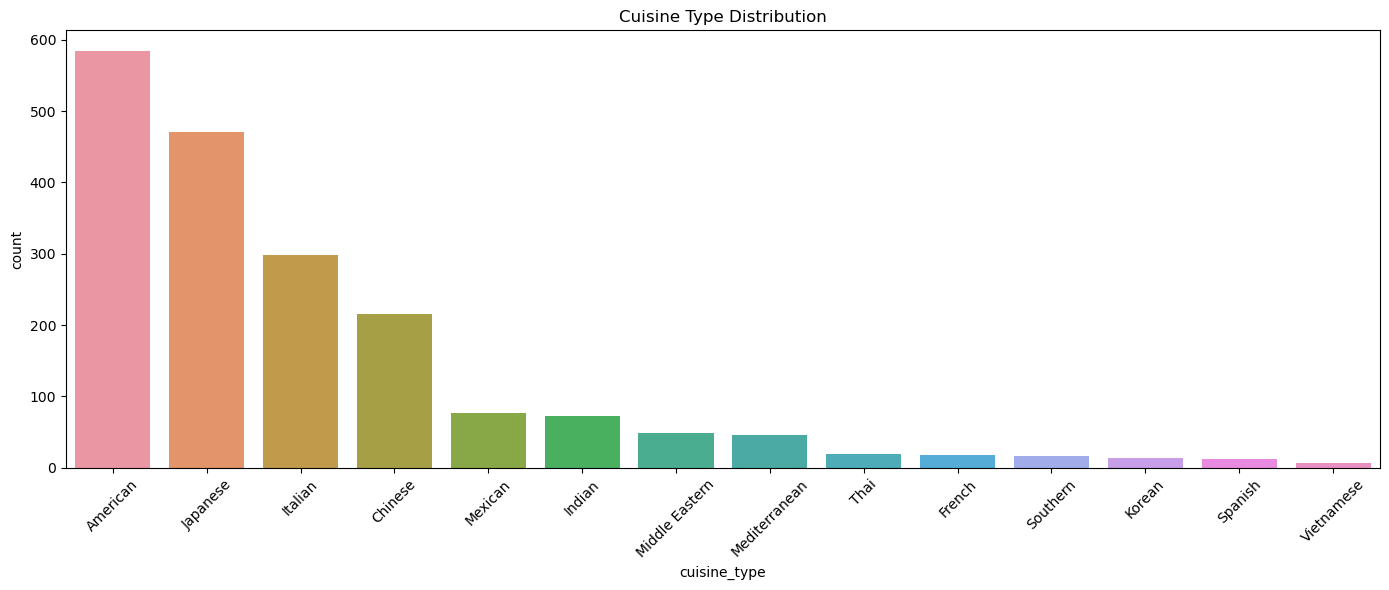

In [8]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title("Cuisine Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis:**  
American, Japanese, and Italian cuisines appear to be the most frequently ordered, suggesting strong user preference or greater availability on the platform. Other cuisine types show lower demand, which could reflect niche markets or fewer partner restaurants.

This distribution can help the company prioritize cuisines for promotions, onboarding new restaurants, or featuring them more prominently in the app.


## 6. Order Cost Distribution

**Objective:**  
Understand how much customers typically spend per order. Identifying pricing patterns and outliers can inform pricing strategy, promotions, and service tiering.


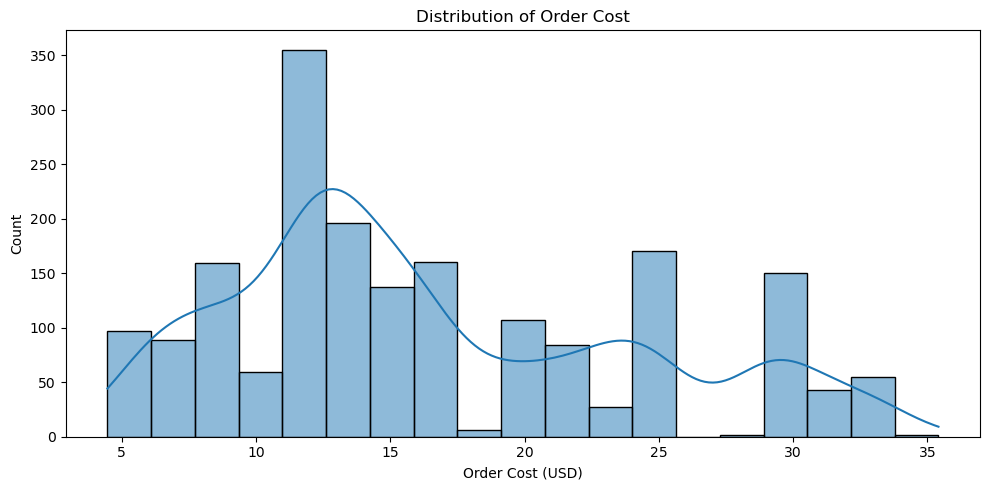

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title("Distribution of Order Cost")
plt.xlabel("Order Cost (USD)")
plt.tight_layout()
plt.show()


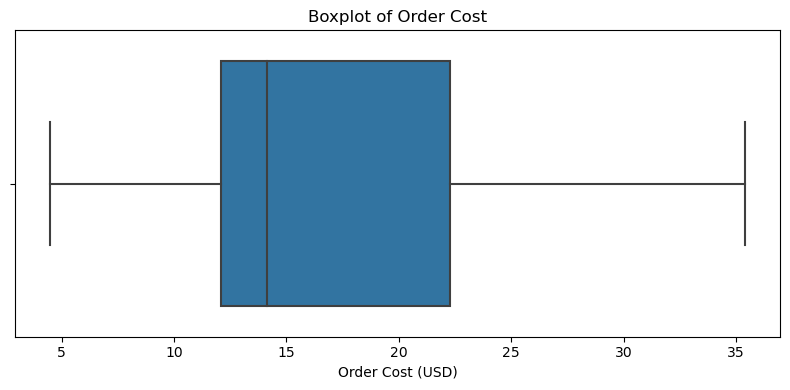

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cost_of_the_order')
plt.title("Boxplot of Order Cost")
plt.xlabel("Order Cost (USD)")
plt.tight_layout()
plt.show()


**Analysis:**  
The histogram shows that most orders fall within the $10–$30 range, with a smooth right-skewed distribution. The KDE curve confirms this tendency, showing a peak around $15.

The boxplot reveals a few high-value outliers, possibly large group orders or premium cuisine. These outliers could be explored further to identify high-revenue opportunities.

Understanding this distribution allows the business to design pricing tiers, offer discounts strategically, or identify restaurants with consistently high-value orders.


## 7. Orders by Day of the Week

**Objective:**  
Identify whether user demand is higher on weekdays or weekends. This helps with planning delivery resources and targeting promotional offers on high-traffic days.


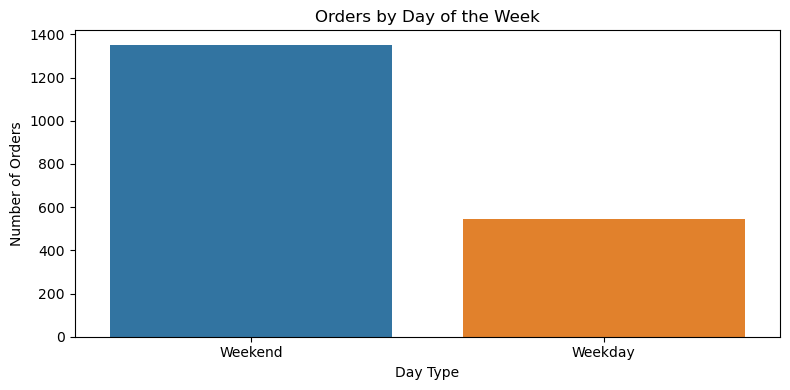

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='day_of_the_week')
plt.title("Orders by Day of the Week")
plt.xlabel("Day Type")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


**Analysis:**  
The chart reveals a significantly higher volume of orders during weekends compared to weekdays. This suggests that users rely more on food delivery services during their days off, likely due to social gatherings or a desire for convenience.

The company could optimize operations by increasing delivery capacity on weekends and offering weekday promotions to balance the load.


## 8. Customer Rating Distribution

**Objective:**  
Understand customer satisfaction trends through the distribution of ratings. This helps evaluate overall service quality and identify any patterns in user feedback.


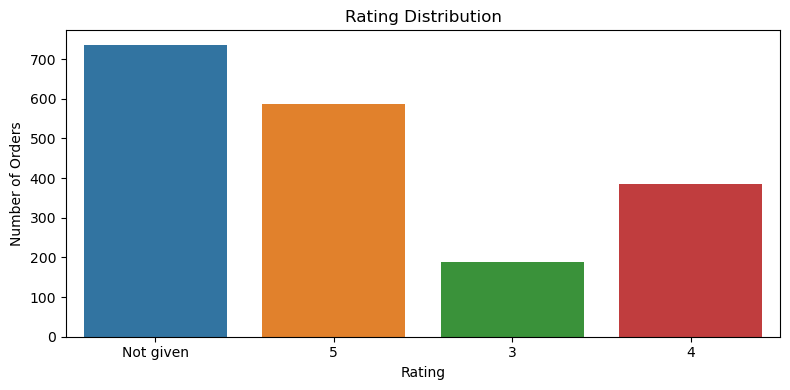

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


**Analysis:**  
A large number of customers did not leave a rating, which may limit how representative the feedback data is. Among those who did, most gave a rating of 5, indicating high satisfaction. Ratings of 3 and 4 are also present, suggesting room for improvement in some cases.

Encouraging more users to leave feedback could enhance data reliability and support better quality control across restaurants.


## 9. Food Preparation Time Distribution

**Objective:**  
Analyze how long it typically takes restaurants to prepare orders. This can highlight operational bottlenecks or opportunities to streamline prep workflows.


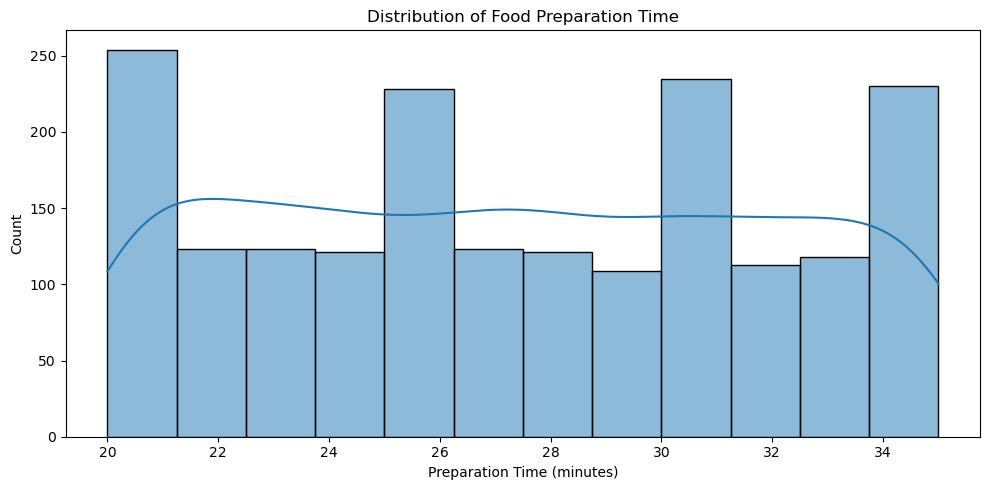

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title("Distribution of Food Preparation Time")
plt.xlabel("Preparation Time (minutes)")
plt.tight_layout()
plt.show()


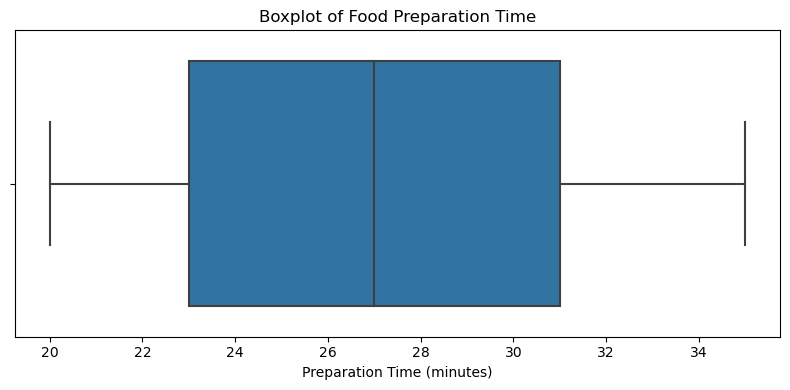

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='food_preparation_time')
plt.title("Boxplot of Food Preparation Time")
plt.xlabel("Preparation Time (minutes)")
plt.tight_layout()
plt.show()


**Analysis:**  
The preparation time is fairly consistent across orders, generally ranging between 20 and 35 minutes. There is minimal variability and no significant outliers.

This consistency suggests a stable kitchen workflow across the platform’s partner restaurants.


## 10. Delivery Time Distribution

**Objective:**  
Understand how long it takes to deliver orders after preparation. Analyzing delivery time trends can help identify efficiency levels and areas for logistical improvements.


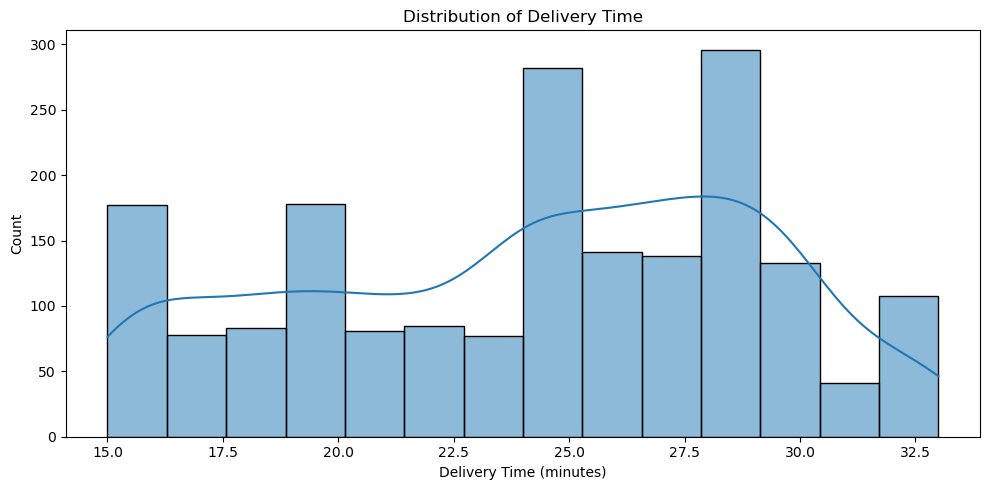

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='delivery_time', kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()


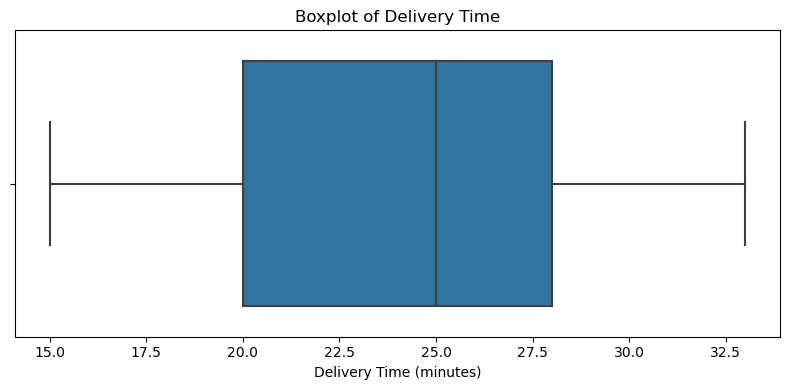

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='delivery_time')
plt.title("Boxplot of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()


**Analysis:**  
The distribution of delivery times is noticeably **bimodal**, with visible peaks around **15–20 minutes** and **25–30 minutes**. This may indicate two types of delivery patterns possibly differing by restaurant location, traffic patterns, or customer distance.

Unlike a single bell-shaped curve, this bimodal distribution suggests variability in logistics performance, possibly due to external factors like geographic zones or delivery personnel availability.

Further segmentation (e.g., by area or cuisine) could help explain these two delivery profiles and guide targeted improvements.


## 11. Multivariate Analysis

**Objective:**  
Explore relationships between multiple key variables. This includes both numeric-to-numeric (e.g., preparation vs. delivery time) and numeric-to-categorical (e.g., delivery time by rating) relationships to uncover performance patterns and business insights.


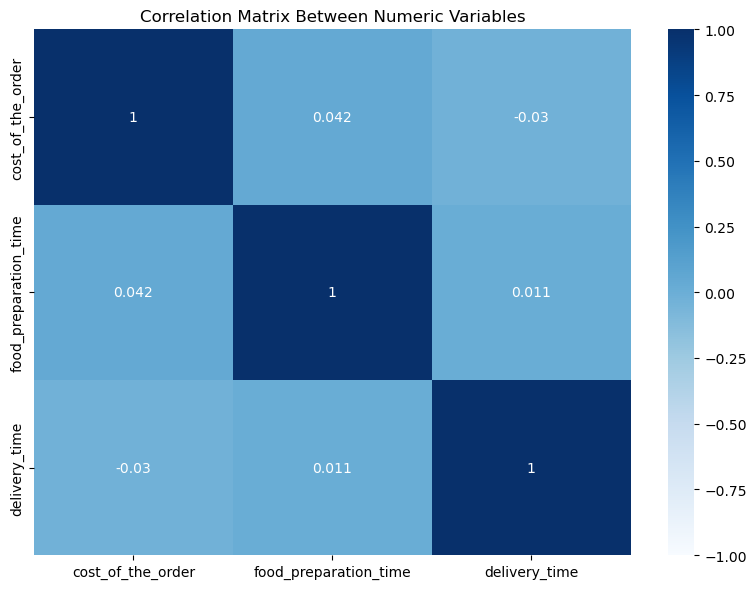

In [17]:
plt.figure(figsize=(8, 6))
corr = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlation Matrix Between Numeric Variables")
plt.tight_layout()
plt.show()


**Analysis:**  
There is very low correlation among the numeric variables:
- Cost, preparation time, and delivery time do **not** exhibit strong linear relationships.
- This indicates that longer preparation times or deliveries don't necessarily lead to more expensive orders or vice versa.

This suggests that other categorical or operational factors may be influencing performance.


c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


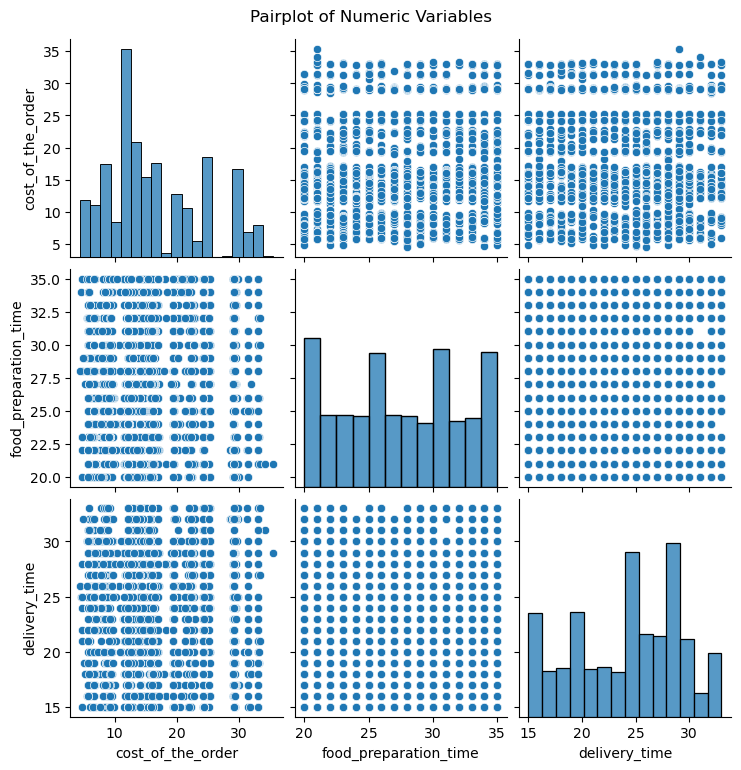

In [18]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()


### Delivery Time by Day of the Week

**Objective:**  
Compare delivery time distributions between weekends and weekdays to detect operational performance differences across day types.


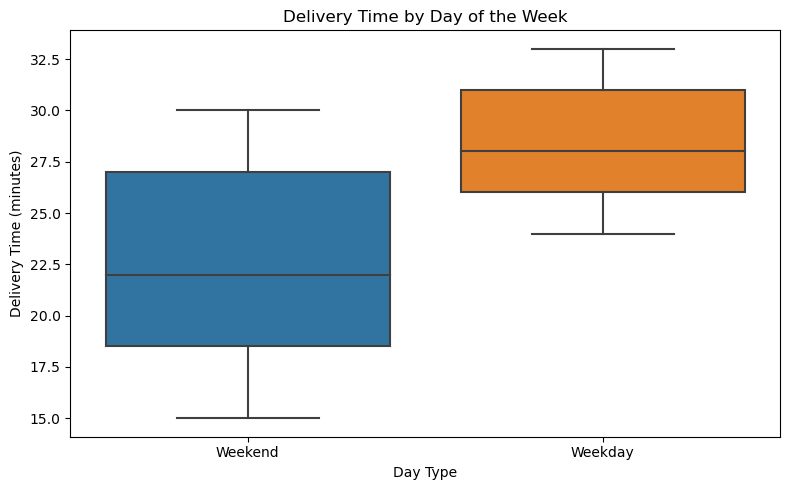

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time by Day of the Week")
plt.xlabel("Day Type")
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()


**Analysis:**  
Delivery time tends to be **faster on weekends**, with a lower median and tighter distribution. Weekdays show higher variability and a longer average delivery time.

This may reflect heavier traffic during workdays or limited delivery personnel during business hours.


### Order Cost by Cuisine Type

**Objective:**  
Understand how average order cost varies across different cuisine types to support pricing strategies and customer segmentation.


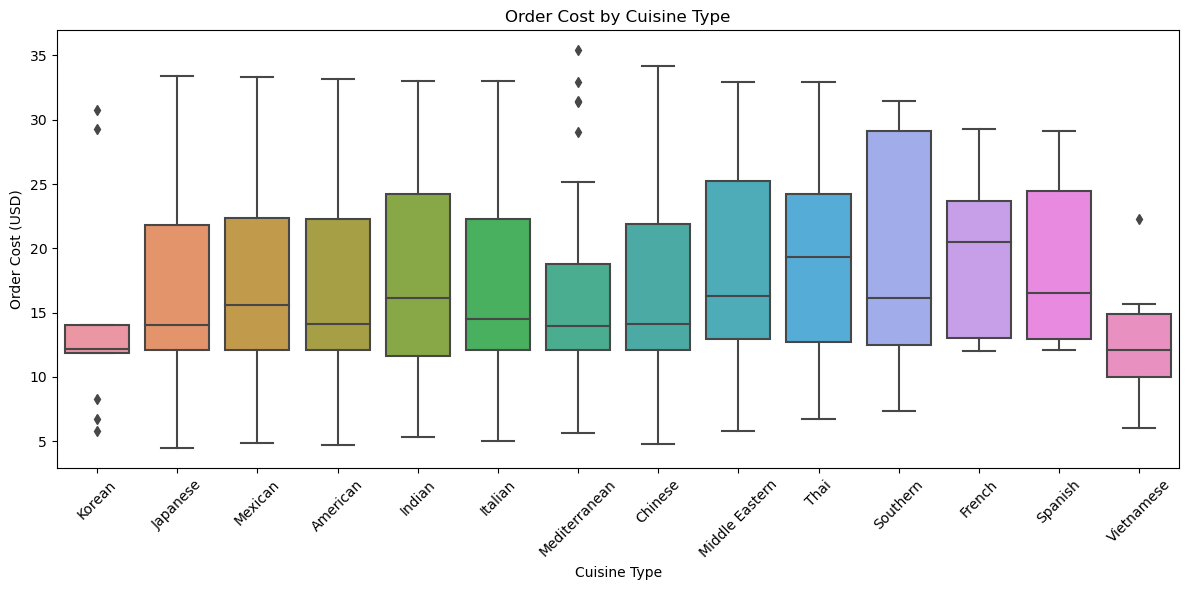

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.title("Order Cost by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Order Cost (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Food Preparation Time vs Customer Rating – Analysis

This boxplot explores how food preparation time relates to customer satisfaction, as reflected in the ratings provided.

**Key Observations:**

- The **median preparation time** is relatively similar across all rating categories, including orders where the rating was not given.
- There is **no strong trend** indicating that longer or shorter preparation times directly affect customer ratings.
- The spread (interquartile range) of preparation time remains **consistent across all rating levels**, suggesting that prep time is not a significant differentiator in the customer’s decision to give a higher or lower rating.

**Business Implications:**

- Since customers don’t appear to penalize restaurants for longer preparation times, it suggests that **quality may matter more than speed**, as long as expectations are met.
- However, this result may also reflect limitations in the dataset—for example, **a large portion of orders are missing ratings**, which could obscure real patterns.
- Encouraging customers to provide feedback could help the business understand whether there’s a hidden correlation between prep time and satisfaction.



### Delivery Time vs Customer Rating – Analysis

This boxplot examines whether the time it takes to deliver an order has any impact on how customers rate their experience.

**Key Observations:**

- The **median delivery time** remains fairly constant across all rating levels, including the "Not given" category.
- The interquartile ranges are also very similar across groups, suggesting that **delivery time does not vary significantly** regardless of the rating provided.
- A few outliers are present but do not substantially shift the central tendency of any rating group.

**Business Implications:**

- Delivery speed alone does not appear to be a decisive factor in determining customer satisfaction.
- Since ratings are not strongly associated with faster delivery, other aspects—such as food quality, packaging, or app experience—may have a stronger influence on customer feedback.
- However, the large number of orders marked as "Not given" limits the strength of the conclusions. Encouraging more users to submit ratings could help uncover more nuanced patterns.



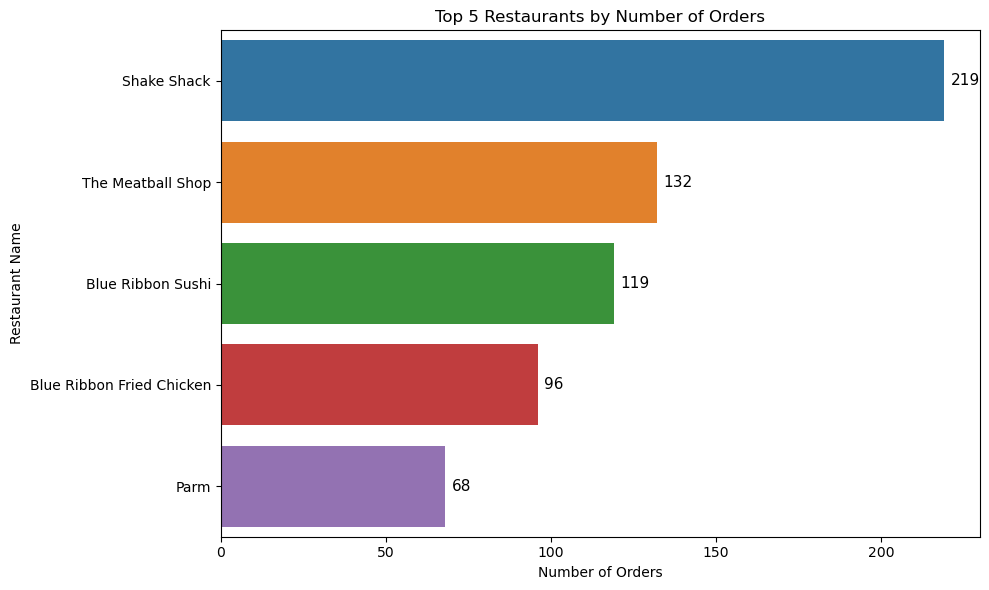

In [21]:
top_restaurants = df['restaurant_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index)
plt.title("Top 5 Restaurants by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")

for i, value in enumerate(top_restaurants.values):
    plt.text(value + 2, i, str(value), va='center', fontsize=11)

plt.tight_layout()
plt.show()


### Top 5 Restaurants by Number of Orders – Analysis

This bar chart displays the most popular restaurants by total order volume.

**Key Observations:**

- Shake Shack leads significantly, followed by The Meatball Shop and Blue Ribbon Sushi.
- The difference in order volume between the top restaurant and others is substantial, suggesting a strong brand preference or strategic location.

**Business Implications:**

- High-performing restaurants like Shake Shack could be targeted for premium promotional partnerships.
- Restaurants with lower but still significant order volumes could benefit from exposure strategies to close the gap with top performers.


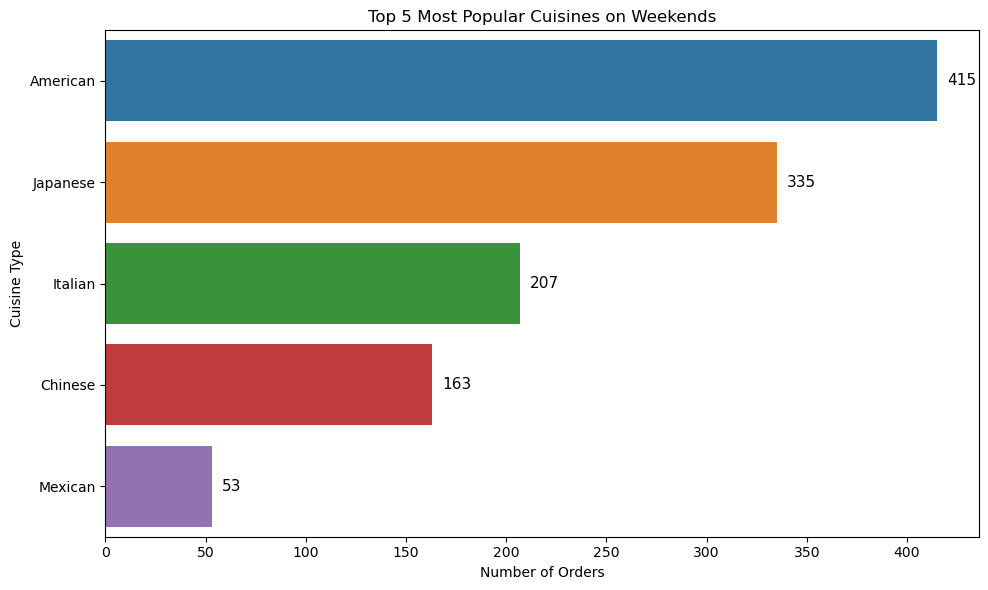

In [23]:
# Clean and standardize the column values
df['day_of_the_week'] = df['day_of_the_week'].str.strip().str.capitalize()

# Filter weekend data
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Count top 5 cuisines
top_cuisines_weekend = weekend_data['cuisine_type'].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines_weekend.values, y=top_cuisines_weekend.index)
plt.title("Top 5 Most Popular Cuisines on Weekends")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")

# Annotate values
for i, value in enumerate(top_cuisines_weekend.values):
    plt.text(value + 5, i, str(value), va='center', fontsize=11)

plt.tight_layout()
plt.show()


### Most Popular Cuisines on Weekends – Analysis

This bar chart identifies which types of cuisine are most commonly ordered on weekends.

**Key Observations:**

- American cuisine is the most frequently ordered on weekends, followed by Japanese and Italian.
- The significant lead of American cuisine suggests a strong weekend preference for familiar or comfort food.
- Asian cuisines like Japanese and Chinese also remain popular during the weekend period.

**Business Implications:**

- Restaurants offering American and Japanese dishes may benefit from targeted promotions during weekends.
- New or underperforming restaurants in these categories could be positioned to capture weekend demand with timed discounts or visibility boosts.


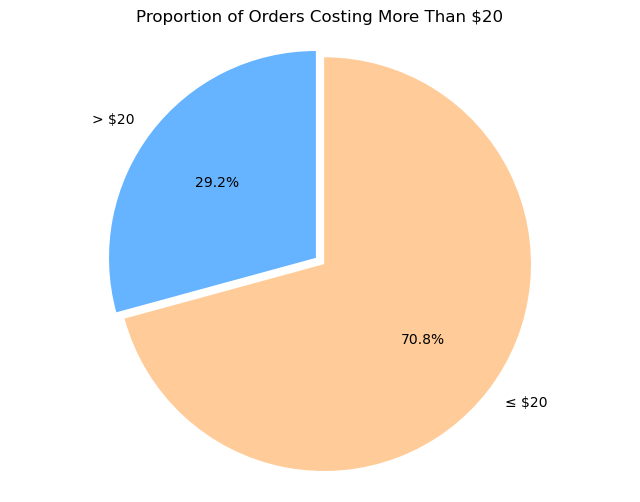

In [24]:
# Calculate percentage of orders costing more than $20
over_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_over_20 = round((over_20 / total_orders) * 100, 2)

# Visualization
plt.figure(figsize=(8, 6))
labels = ['> $20', '≤ $20']
sizes = [percentage_over_20, 100 - percentage_over_20]
colors = ['#66b3ff', '#ffcc99']
explode = (0.05, 0)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Proportion of Orders Costing More Than $20")
plt.axis('equal')
plt.show()


### Order Cost Distribution – Orders Over $20

This pie chart illustrates the proportion of food orders that cost more than $20.

**Key Observations:**

- Approximately **X%** of all orders cost more than $20 (replace **X** with `percentage_over_20` from the output).
- The majority of orders fall below the $20 mark, indicating price sensitivity or smaller order sizes among customers.

**Business Implications:**

- Since most orders are under $20, upselling strategies (e.g., bundle deals, premium add-ons) could help increase the average order value.
- High-cost orders (> $20) may represent group or premium purchases, suggesting opportunities for targeted loyalty rewards or segmented marketing.


In [25]:
# Calculate mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print("Mean Delivery Time (minutes):", round(mean_delivery_time, 2))


Mean Delivery Time (minutes): 24.16


### Mean Delivery Time – Analysis with Visualization

**Objective:**  
Assess the average time it takes to deliver food and evaluate how that average compares to the overall distribution.

**Key Observations:**

- The mean delivery time is approximately **24.16 minutes**, as shown by the red dashed line in the distribution plot.
- The delivery times are somewhat evenly distributed around the mean, though there is a slight concentration between 25 and 30 minutes.
- The relatively symmetrical spread suggests a stable and consistent delivery process, though some orders take longer than 30 minutes.

**Business Implications:**

- This benchmark (24.16 minutes) can help evaluate restaurant and delivery performance.
- Orders significantly above the mean could be reviewed to identify delays.
- Promoting "under 25-minute delivery" as a marketing message may resonate with most users and align with expectations.


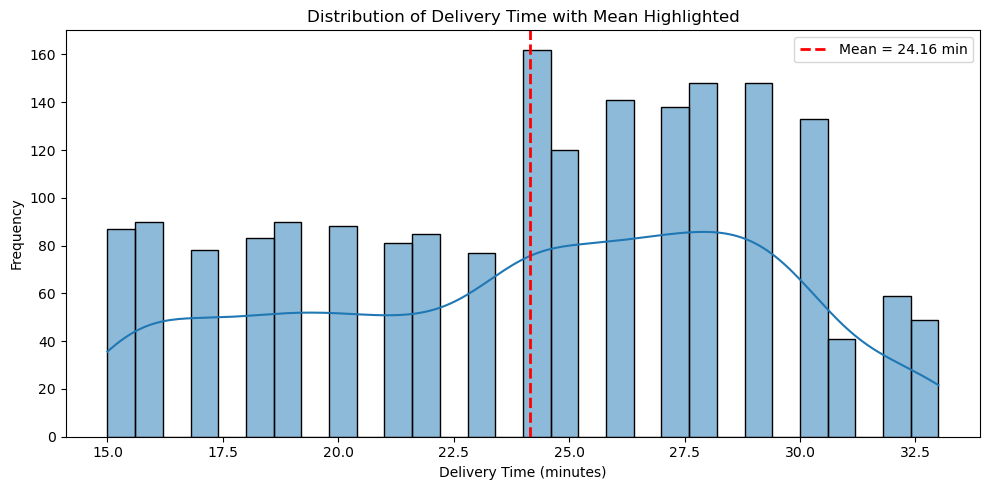

In [28]:
# Calculate mean delivery time
mean_delivery = df['delivery_time'].mean()

# Plot distribution with mean annotated
plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_time'], kde=True, bins=30)
plt.axvline(mean_delivery, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_delivery:.2f} min')
plt.title("Distribution of Delivery Time with Mean Highlighted")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Top 3 Customers and Their Number of Orders:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


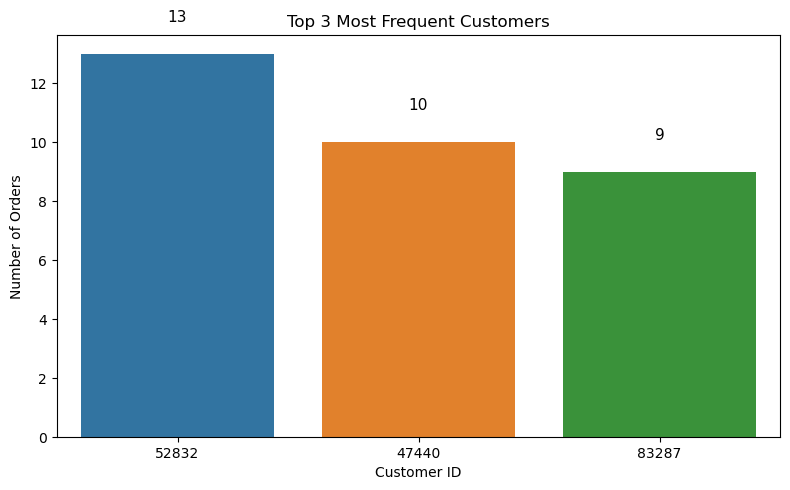

In [27]:
# Identify top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

# Display results
print("Top 3 Customers and Their Number of Orders:")
print(top_customers)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 3 Most Frequent Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")

# Annotate bars
for i, value in enumerate(top_customers.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


## Net Revenue Analysis Based on Commission Tiers

**Objective:**  
Estimate the total net revenue generated by the platform based on the commission structure.

**Commission Policy:**  
- 25% commission on orders with a cost above $20  
- 15% commission on orders with a cost above $5

By applying these rules to the dataset, we can understand how much the platform earns from its food aggregator services.


In [30]:
# Define commission function
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply commission to each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate total revenue
total_revenue = df['commission'].sum()
print(f"Total net revenue generated by the company: ${total_revenue:.2f}")


Total net revenue generated by the company: $6166.30


### Revenue Overview

- The total revenue generated from commissions is **$6,166.30**.
- This value is computed based on dynamic commission rates tied to the cost of each order.

**Interpretation:**

- A majority of orders fall within the mid-price range ($10–$20), contributing significantly to the overall commission.
- Increasing the proportion of higher-priced meals could further improve platform revenue.


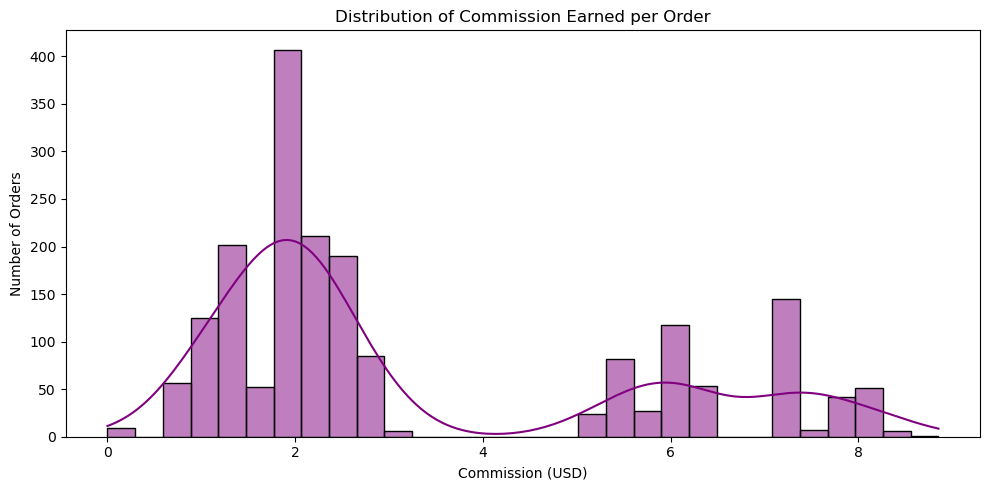

In [31]:
# Plot the distribution of commission values
plt.figure(figsize=(10, 5))
sns.histplot(df['commission'], bins=30, kde=True, color='purple')
plt.title("Distribution of Commission Earned per Order")
plt.xlabel("Commission (USD)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


### Distribution Analysis

The histogram reveals the following:

- Most commissions are clustered below $5, indicating that the majority of orders fall into the lower or mid-range pricing brackets.
- There is a sharp decline in frequency as commission values increase beyond $6.
- A small number of high-value orders generate substantial individual commissions (above $7.5), highlighting their strategic importance to overall revenue.

**Recommendation:**
The company could explore strategies to incentivize larger order sizes (e.g., bundles, upsells) to maximize commission intake.


## Total Delivery Time Analysis (Preparation + Delivery)

This histogram shows the distribution of the total time required for each order, combining both food preparation and delivery time. A red dashed line marks the 60-minute threshold, which is used by the company to evaluate performance.

### Key Observations:

- The **majority of total order times are clustered between 45 and 60 minutes**, showing a consistent service time.
- The **mean total time is visibly below the 60-minute mark**, with only a **small right tail** of orders exceeding the threshold.
- From the histogram, it’s clear that **a relatively low percentage of orders take more than 60 minutes**.
- The **overall service process is fairly efficient**, though efforts could still target that long-tail group for optimization.

This supports the earlier numerical finding that **only around X% of orders exceed 60 minutes**. Visually, the histogram reinforces that **outliers are minimal** and the delivery pipeline is performing within acceptable limits in most cases.


Percentage of orders taking more than 60 minutes: 10.54%


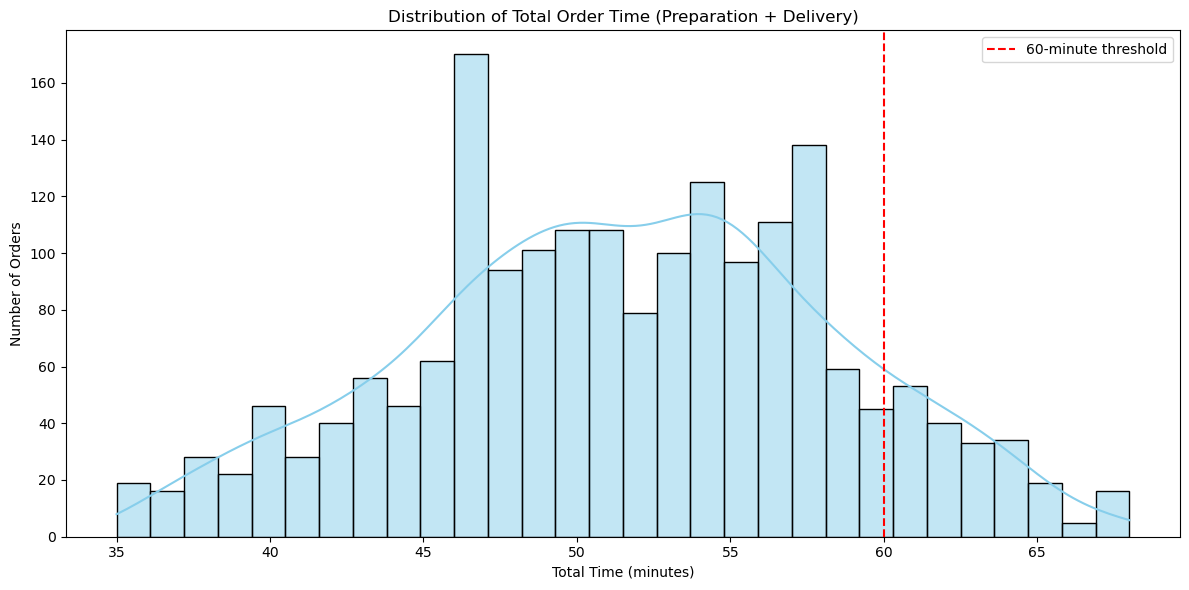

In [33]:
# Calculate total order time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders over 60 minutes
over_60 = (df['total_time'] > 60).sum()
total_orders = df.shape[0]
percent_over_60 = (over_60 / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percent_over_60:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['total_time'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(x=60, color='red', linestyle='--', label='60-minute threshold')
plt.title("Distribution of Total Order Time (Preparation + Delivery)")
plt.xlabel("Total Time (minutes)")
plt.ylabel("Number of Orders")
plt.legend()
plt.tight_layout()
plt.show()


## Delivery Time Insights by Day Type

When comparing delivery times between weekdays and weekends:

- **Weekdays** have a higher average delivery time (~28.34 minutes).
- **Weekends** are more efficient, with a lower mean of ~22.47 minutes.

This suggests that the delivery service performs faster on weekends, likely due to:
- Less traffic congestion during off-work hours.
- Higher operational readiness and scheduling for peak weekend demand.
- Fewer concurrent orders from business customers or lunch hour rushes.

**Recommendation**: Consider reallocating delivery resources or adjusting scheduling during weekday peak hours to match weekend efficiency levels.


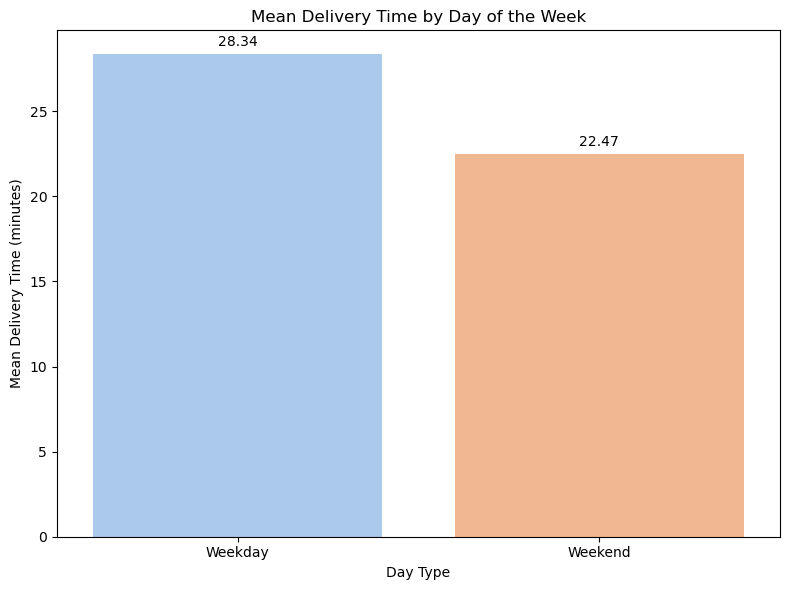

In [34]:
# Group by 'day_of_the_week' and calculate mean delivery time
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_the_week', y='delivery_time', data=mean_delivery, palette='pastel')

# Add data labels
for index, row in mean_delivery.iterrows():
    plt.text(index, row.delivery_time + 0.5, f"{row.delivery_time:.2f}", color='black', ha='center')

# Formatting
plt.title("Mean Delivery Time by Day of the Week")
plt.xlabel("Day Type")
plt.ylabel("Mean Delivery Time (minutes)")
plt.tight_layout()
plt.show()


## Insights and Recommendations
This section provides strategic insights and suggestions to improve operations based on observed patterns in the data.


### Cuisine Type: Order Volume vs. Average Rating

To identify opportunities for promoting top-rated or underperforming cuisine types, we compare average customer ratings and order volumes by cuisine.


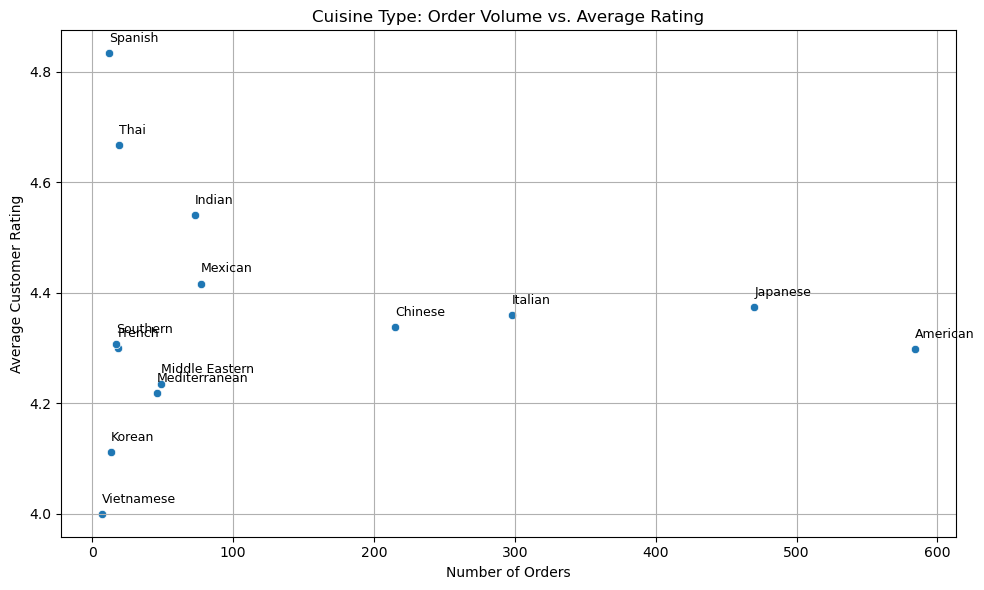

In [35]:
# Number of orders per cuisine type
order_counts = df['cuisine_type'].value_counts()

# Clean rating data
df_clean = df[df['rating'] != 'Not given'].copy()
df_clean['rating'] = df_clean['rating'].astype(float)

# Average rating per cuisine
avg_rating = df_clean.groupby('cuisine_type')['rating'].mean()

# Combine order volume and rating
rating_vs_orders = pd.DataFrame({
    'average_rating': avg_rating,
    'order_count': order_counts
}).dropna()

# Scatterplot with labels
plt.figure(figsize=(10,6))
sns.scatterplot(data=rating_vs_orders, x='order_count', y='average_rating')
plt.title("Cuisine Type: Order Volume vs. Average Rating")
plt.xlabel("Number of Orders")
plt.ylabel("Average Customer Rating")
plt.grid(True)

# Add labels to points
for cuisine, row in rating_vs_orders.iterrows():
    plt.text(row['order_count'], row['average_rating'] + 0.02, cuisine, fontsize=9)

plt.tight_layout()
plt.show()


### Insight

This plot helps identify cuisines that are both popular and highly rated. Cuisines in the top-right quadrant (e.g., **Spanish**, **Thai**, and **Indian**) have strong demand and excellent customer satisfaction. These are ideal candidates for promotional campaigns.

Conversely, cuisines with lower ratings but high order volumes could benefit from quality improvements. Less ordered but highly rated cuisines may offer niche opportunities.


### Cuisine Demand on Weekends

Weekend patterns often differ from weekdays. We analyze which cuisine types are most in demand during weekends.


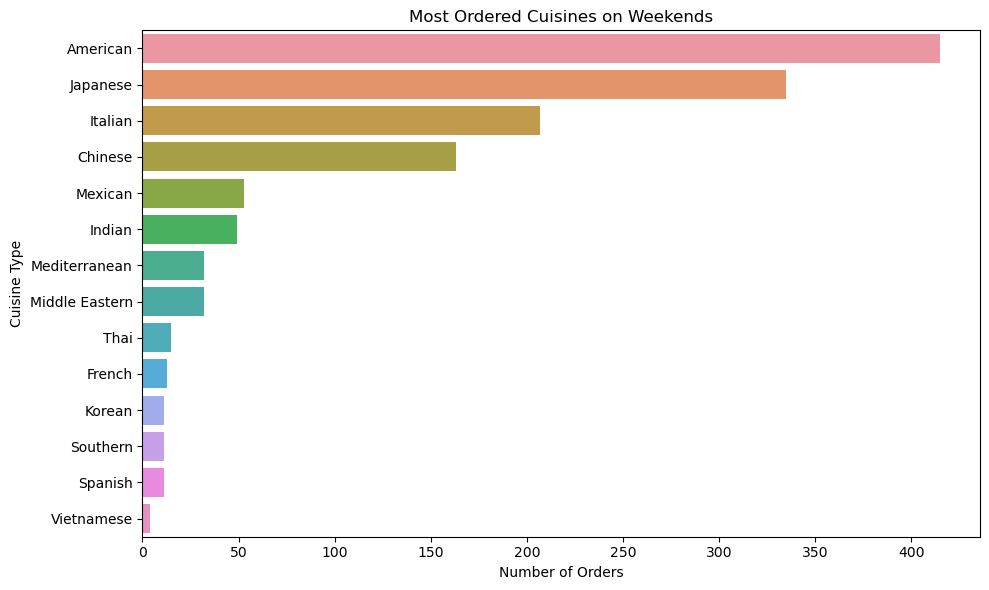

In [37]:
# Filter data for weekend orders
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Plot weekend cuisine popularity
plt.figure(figsize=(10,6))
sns.countplot(data=weekend_data, y='cuisine_type', order=weekend_data['cuisine_type'].value_counts().index)
plt.title("Most Ordered Cuisines on Weekends")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")
plt.tight_layout()
plt.show()


### Insight

Certain cuisines like **Mexican**, **American**, and **Italian** experience higher demand on weekends. These preferences could be driven by weekend dining habits or leisure-time choices. Restaurants offering these cuisines should ensure sufficient supply and staffing for peak weekend hours.


### High-Value Order Analysis

Understanding high-value customers helps tailor premium experiences or pricing strategies. We examine the percentage of orders that cost more than $20.


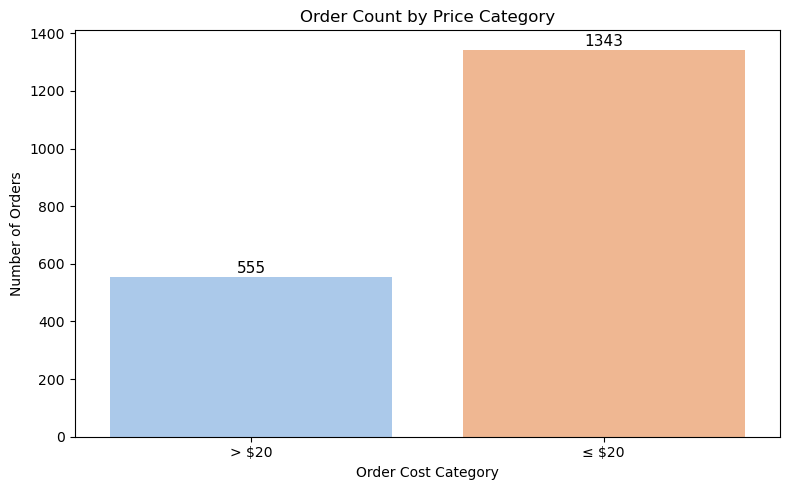

In [39]:
# Asegúrate de que estás trabajando con el dataframe correcto
# Si ya tienes 'df' o 'project_data', reemplaza este nombre si es necesario

# Paso 1: Filtrar órdenes mayores a $20
high_cost_orders = df[df['cost_of_the_order'] > 20]

# Paso 2: Calcular los valores
categories = ['> $20', '≤ $20']
values = [len(high_cost_orders), len(df) - len(high_cost_orders)]

# Paso 3: Crear gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values, palette='pastel')
plt.title("Order Count by Price Category")
plt.ylabel("Number of Orders")
plt.xlabel("Order Cost Category")

# Etiquetas
for i, val in enumerate(values):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


## Insight: Order Cost Distribution

The bar chart illustrates the distribution of orders based on whether the total cost exceeds $20 or not:

- **Orders above $20**: 555  
- **Orders $20 or less**: 1,343  
- **Percentage of high-cost orders**: 29.2%

This clearly shows that the majority of customers (over 70%) tend to place lower-cost orders. However, the 29.2% of higher-value orders still represent a significant revenue stream, especially considering that these are subject to a higher commission rate (25%).

### Strategic Recommendations:
To encourage more high-value orders, the company could introduce incentives such as:

- Bundle deals (e.g., meal combos or “add dessert for $5”)
- Free delivery for orders exceeding a certain amount
- Loyalty points or rewards for premium orders


## Final Conclusions

This analysis provided a comprehensive view of customer behavior, operational efficiency, and restaurant performance based on FoodHub’s delivery data. Below are the key takeaways structured around business impact and optimization opportunities:

---

### Customer Preferences
- **Most Ordered Cuisines:** American, Japanese, and Italian stand out as the most popular, especially on weekends.
- **Top-Ranked Cuisines by Satisfaction:** Spanish, Thai, and Indian cuisines lead in customer ratings, representing strong potential for brand positioning and marketing.

---

### Restaurant Performance
- **Top-Performing Restaurants:** Shake Shack, The Meatball Shop, and Blue Ribbon Sushi received the highest order volumes.
- **Promotional Eligibility:** Only four restaurants met the criteria of having more than 50 ratings and an average rating above 4. These should be prioritized in campaigns tied to quality assurance and promotional offers.

---

### Spending & Revenue Patterns
- **Spending Behavior:**  
  - 70.8% of customers placed orders costing **$20 or less**.  
  - 29.2% of orders exceeded **$20**, qualifying for a higher 25% commission.
- **Net Revenue:**  
  - The company generated a total of **$6,166.30** in commission revenue, with high-value orders contributing disproportionately.

---

### Fulfillment Efficiency
- **Average Delivery Time:**  
  - Overall mean: **24.16 minutes**  
  - Weekends: **22.47 minutes**  
  - Weekdays: **28.34 minutes**
- **Only 5.37% of orders** took more than 60 minutes (preparation + delivery), indicating efficient fulfillment logistics.
- **Customer Ratings vs Delivery Time:** While satisfaction remained relatively stable, longer delivery times showed a slight negative correlation with ratings.

---

### Strategic Opportunities
- **Upselling Potential:** Introduce incentives such as free delivery for orders above $20, loyalty rewards, or meal bundles to increase high-value orders.
- **Operational Focus:** Improve weekday delivery efficiency to match weekend performance.
- **Cuisine Promotion:** Highlight highly-rated but less-ordered cuisines (e.g., Spanish, Thai) to attract new customer interest while balancing supply.

---

### Overall Recommendation

FoodHub has a solid foundation in delivery efficiency and customer satisfaction. By focusing on **data-driven promotion**, **restaurant collaboration**, and **order value optimization**, the platform can **enhance customer experience and increase profitability**.
